In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Identify Missing Values

In [67]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


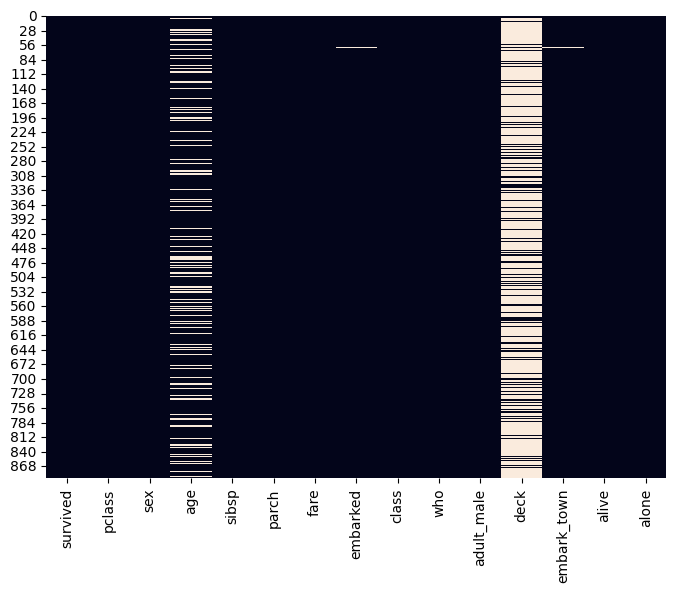

In [68]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [69]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [70]:
missing_values_perc = df.isnull().sum()/len(df) *100
round(missing_values_perc, 2).sort_values(ascending=False)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


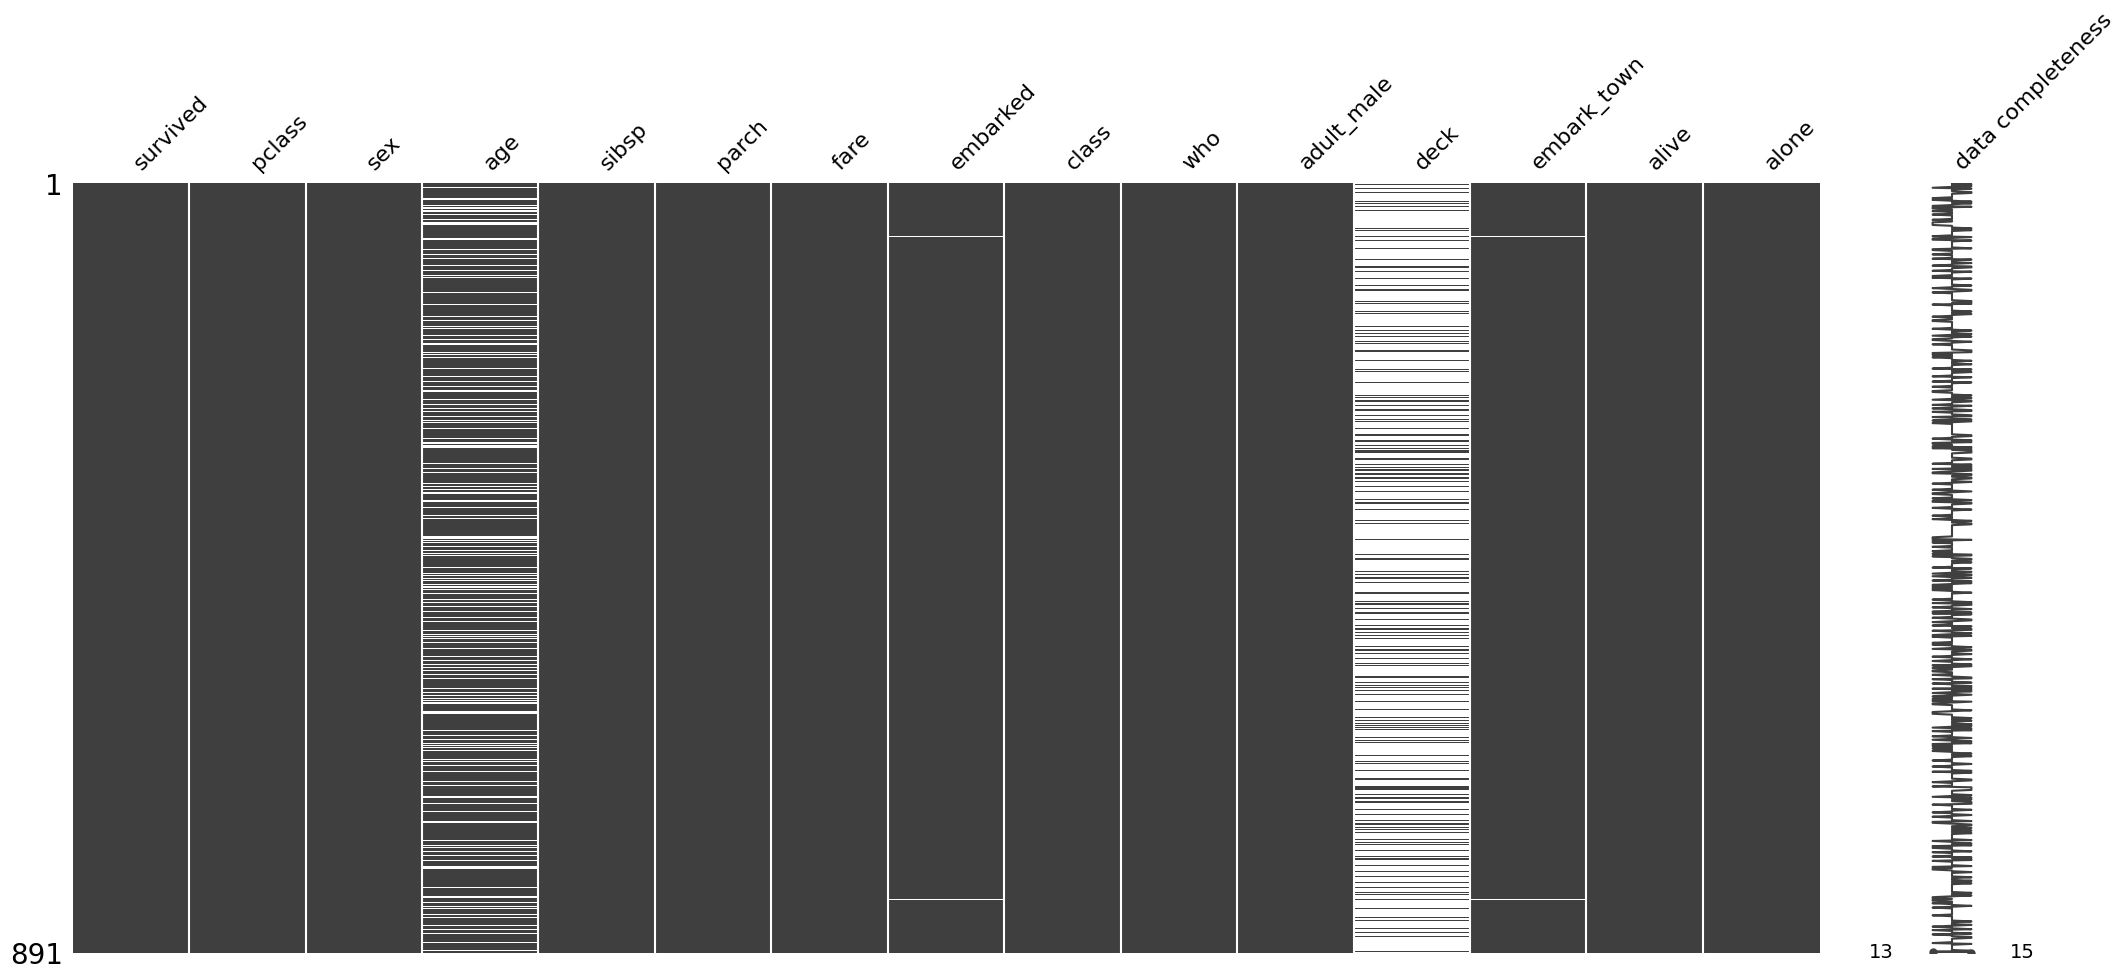

In [72]:
# using msno library

# msno -> missing number 

import missingno as msno  


msno.matrix(df, labels=True )
plt.show()

## Handling Missing Values

- The first and most reliable is to collect the data again 

- Impute mean or median and mode

- Forward fill  (fill in missing values with next available value)

- Backward fill 

- KNN

- Deep Learning -> Iterative Imputer

- Delete  rows/columns with missing values

In [73]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [74]:
# Replacing with mean median or mode 

# Mean, Median -> Numberical

# Mode -> Categorical 

round(df['age'].mean(), 2)




29.7

In [75]:
df['age'].median()   

28.0

- Mean: Use for symmetrically distributed data (normal distribution).

- Median: Use for skewed distributions (data with tails on one side).

Note:  Median is generally less sensitive to outliers, making it a safer choice when unsure of the distribution.

In [76]:
df['age'] = df['age'].fillna(df['age'].median())


In [77]:
df.isnull().sum().sort_values(ascending = False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [78]:
# removing deck 
df.drop(columns = 'deck', axis = 1, inplace = True)

In [79]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [86]:
# replacing embarked with mode 

df['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [87]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [89]:
df["embark_town"].fillna("Southampton", inplace = True)

df.isnull().sum().sort_values(ascending = False)

embarked       2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Imputing Missing values using sk-learn

In [90]:
df2 = sns.load_dataset("titanic")

In [92]:
df2.isnull().sum().sort_values(ascending = False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [95]:
df2.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [100]:

from sklearn.impute import SimpleImputer # for univariant imputation 

imputer = SimpleImputer(strategy='median')

df2["age"] = imputer.fit_transform(df2[["age"]])


Here's a breakdown of the code, explaining each step in an easy-to-remember way:

**1. Import the tool:**

Imagine you're at a repair shop fixing a broken table leg. First, you need the right tools. Here, we **import the `SimpleImputer` tool** from the `scikit-learn` library to fix the missing values in your data.

**2. Create the fixer:**

Think of the `SimpleImputer` as your repair person. You give them instructions on how to fix the table leg (missing values) and the tools they need (the data). Here, we **create an `imputer` object** and tell it to use the **"median" strategy** to fix the missing values.

**3. Train the fixer:**

Just like showing the repair person the broken leg, we need to **show the `imputer` the data** with missing values. Here, we use `imputer.fit(df2[["age"]])` to **train the imputer** on the "age" column of your data (`df2`). This tells the imputer what the typical values in the "age" column look like, including how spread out they are.

**4. Fix the data:**

Once the repair person is familiar with the problem, they can fix the table leg. Here, we use `df2["age"] = imputer.transform(df2[["age"]])` to **fix the missing values** in the "age" column of your data (`df2`). The imputer uses the knowledge it gained from training (step 3) to replace the missing values with the median value it calculated.



In [101]:
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [102]:
df3 = sns.load_dataset("titanic")

In [107]:
# for multivariat imputation 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

itr_imputer = IterativeImputer(max_iter=20)

df3["age"] = itr_imputer.fit_transform(df3[["age"]])

In [106]:
df3.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [108]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [109]:
# forward and backward fill 

df['embark_town'] = df['embark_town'].fillna(method = 'ffill')


In [110]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [112]:
df["embarked"] = df["embarked"].ffill
# df["embarked"] = df["embarked"].bfill

df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Using KNN imputer

In [114]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
df["age"] = imputer.fit_transform(df[["age"]])

In [115]:
# drop na method 

df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [119]:
df2.dropna(inplace=True)  # drop all the rows  having null values 

df2.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
